In [1]:
print("Covid-19")

Covid-19


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [6]:
files = os.listdir(r"C:\Users\SAI\Documents\DA Projects\Python\Covid-19 Data Analysis\Covid-19")
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [12]:
def read_data(path, filename):
    return pd.read_csv(path+'/'+ filename)

In [15]:
path = r"C:\Users\SAI\Documents\DA Projects\Python\Covid-19 Data Analysis\Covid-19"
world_data = read_data(path, 'worldometer_data.csv')

In [16]:
world_data.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [18]:
day_wise = read_data(path, files[2])

In [19]:
group_data = read_data(path, files[3])

In [21]:
usa_data = read_data(path, files[4])

In [22]:
province_data = read_data(path, files[1])

In [23]:
country_wise = read_data(path, files[0])

In [24]:
province_data.shape

(49068, 10)

In [ ]:
# Which country has maximum total cases, deaths, recovered & active cases ?

In [25]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

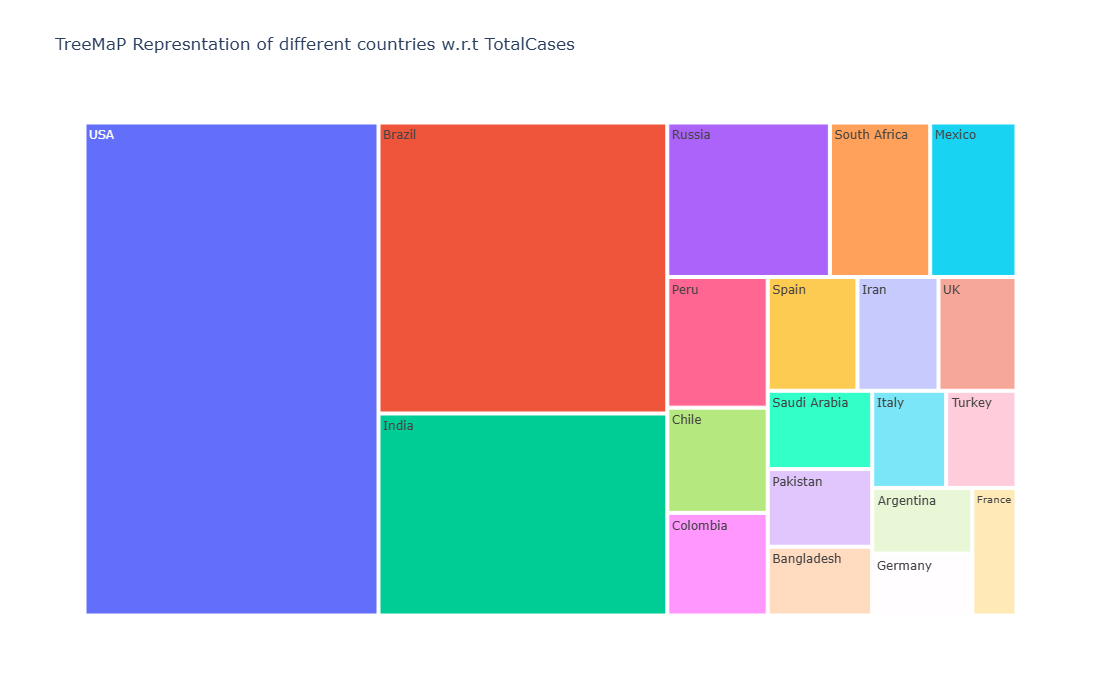

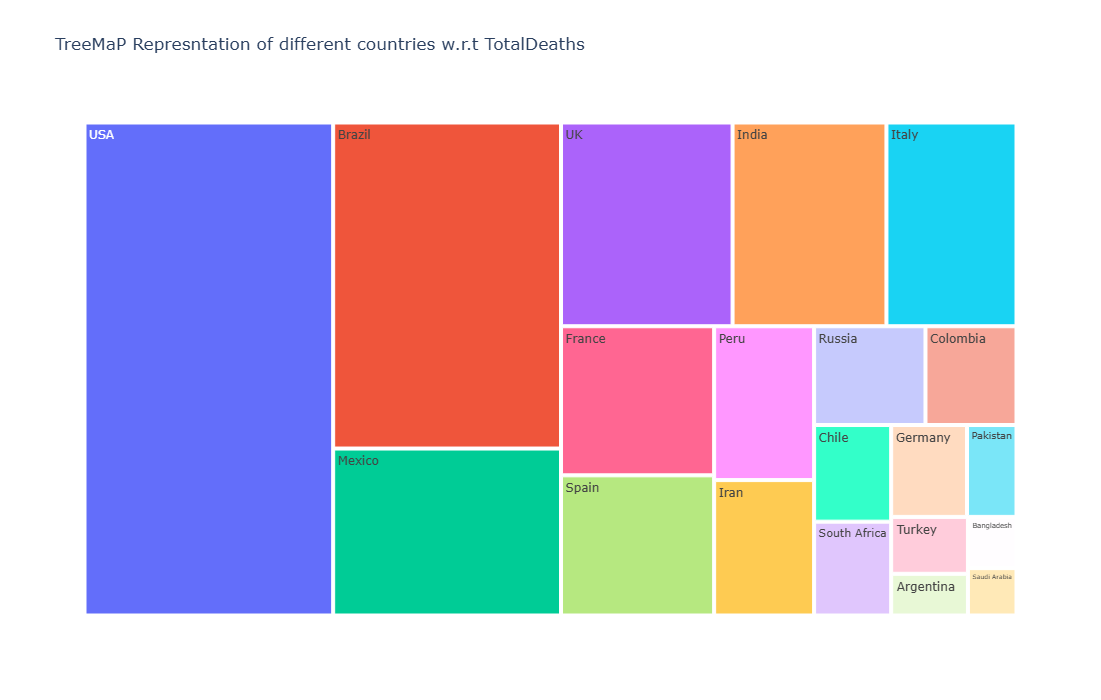

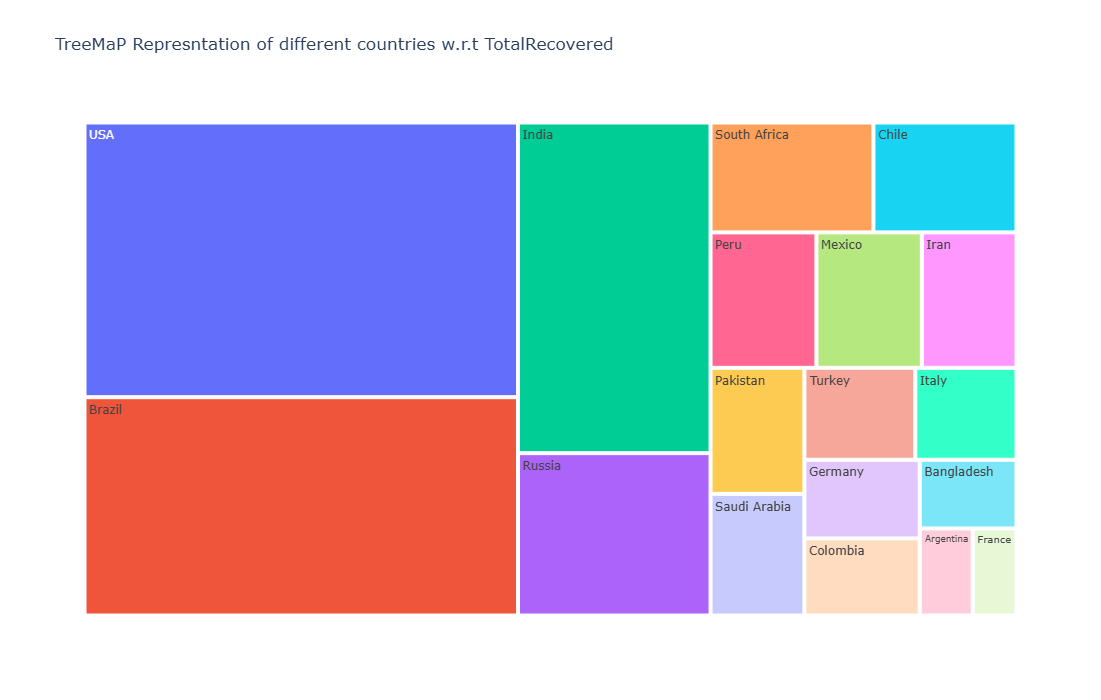

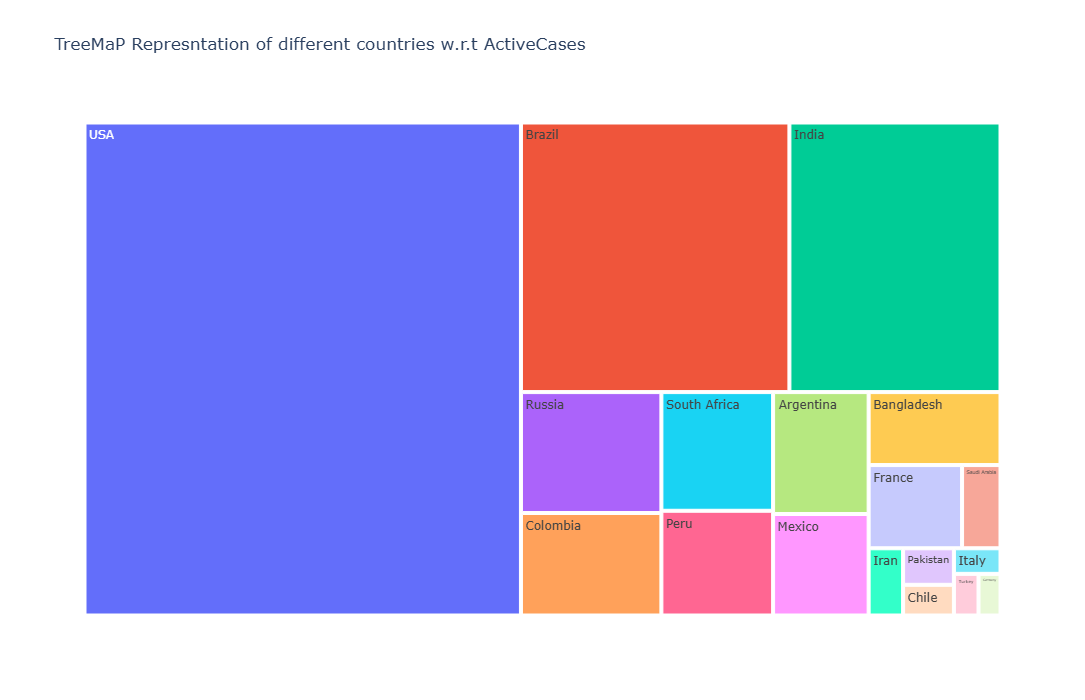

In [29]:
columns = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in columns:
    fig=px.treemap(world_data.iloc[0:20], values=i, path=['Country/Region'], title='TreeMaP Represntation of different countries w.r.t {}'.format(i),width=1000,height=700)
    fig.show()

In [ ]:
# What is the trend of confirmed deaths recovered Active cases

In [30]:
day_wise.head(2)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8


In [31]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

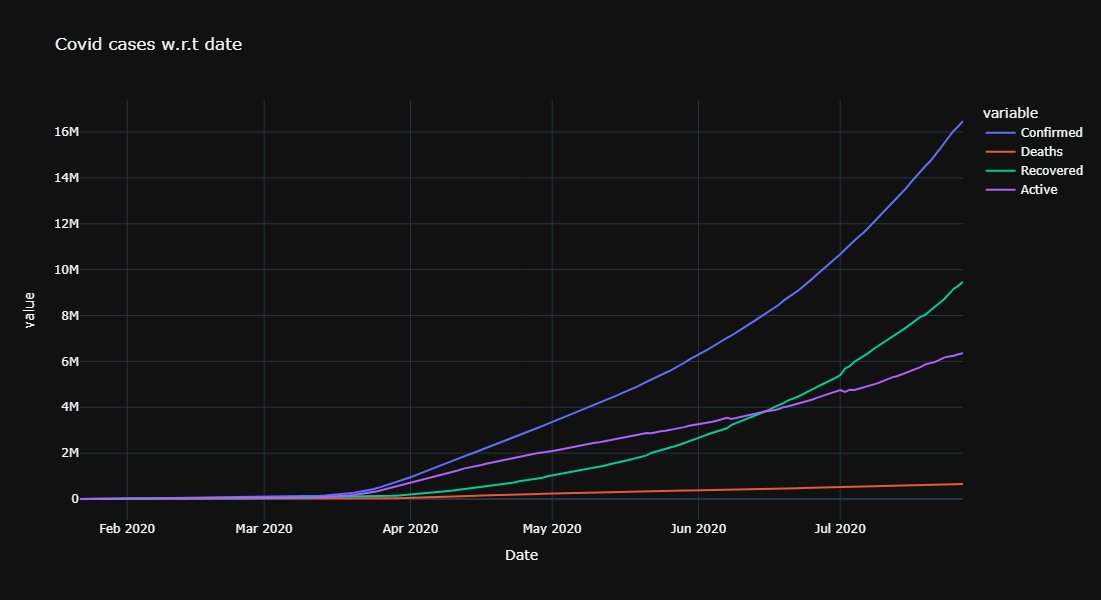

In [35]:
px.line(day_wise, x='Date', y=['Confirmed', 'Deaths', 'Recovered', 'Active'],title='Covid cases w.r.t date', template='plotly_dark',width=1000,height=600)

In [ ]:
# Visualize population to tests done ratio

In [36]:
pop_test = world_data['Population']/world_data['TotalCases'].iloc[0:20]

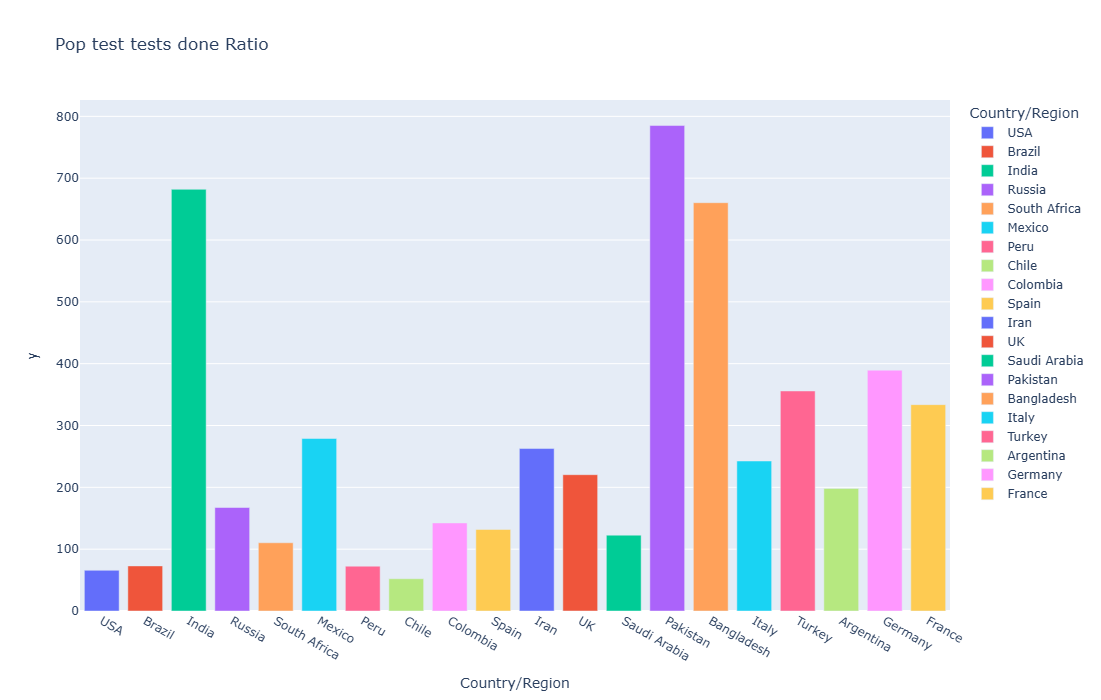

In [40]:
fig2 = px.bar(world_data.iloc[0:20], x='Country/Region', y=pop_test[0:20], color='Country/Region', title='Pop test tests done Ratio',width=1000,height=700)
fig2.show()

In [ ]:
# 20 Countries that are badly affected by corona virus

In [41]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

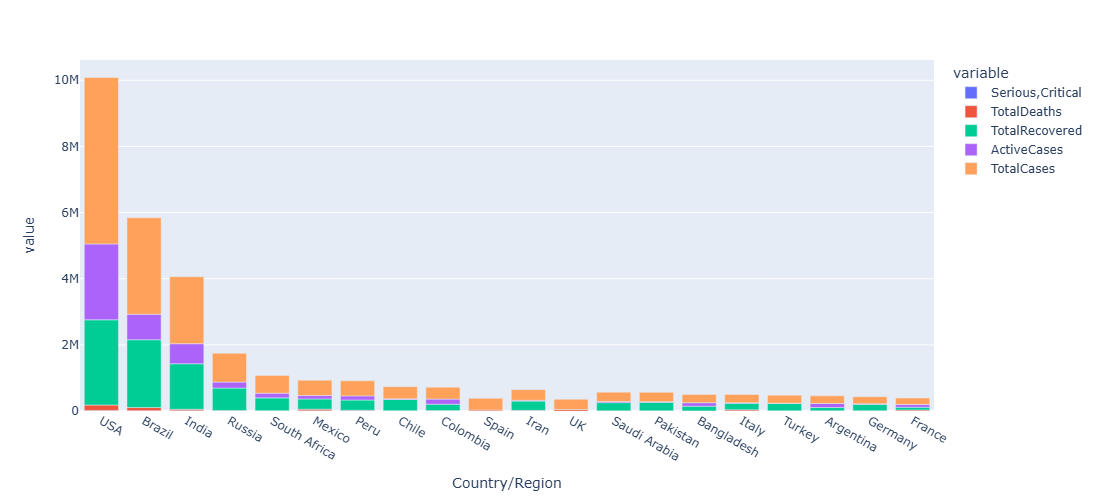

In [45]:
px.bar(world_data[0:20],x='Country/Region', y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'],width=1100,height=500)

In [ ]:
# Worst 20 countries having maximum - Confirmed Cases

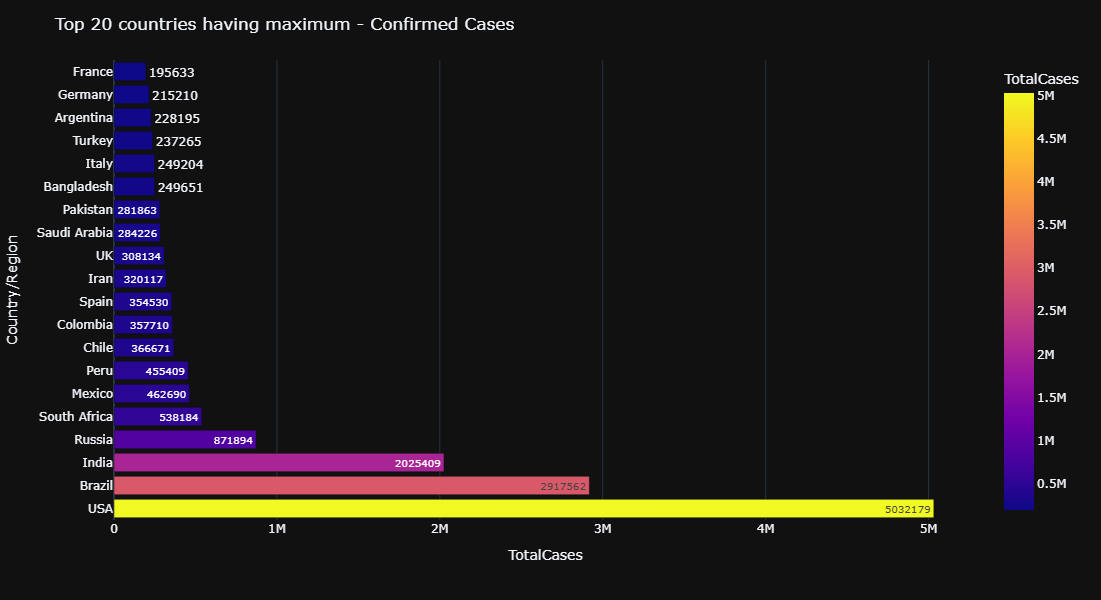

In [54]:
fig3 = px.bar(world_data.iloc[0:20], y='Country/Region', x='TotalCases',color='TotalCases',text='TotalCases')
fig3.update_layout(template='plotly_dark', title_text='Top 20 countries having maximum - Confirmed Cases',height=600)
fig3.show()

In [ ]:
# Worst 20 countries having maximum - total Cases

In [57]:
world_data.sort_values(by='TotalDeaths', ascending=False)[0:20]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
15,Italy,Europe,6.045257e+07,249204,NaN,35187.0,NaN,201323.0,NaN,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe
19,France,Europe,6.528831e+07,195633,NaN,30312.0,NaN,82460.0,NaN,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
10,Iran,Asia,8.409762e+07,320117,NaN,17976.0,NaN,277463.0,NaN,24678.0,4156.0,3806.0,214.0,2612763.0,31068.0,EasternMediterranean


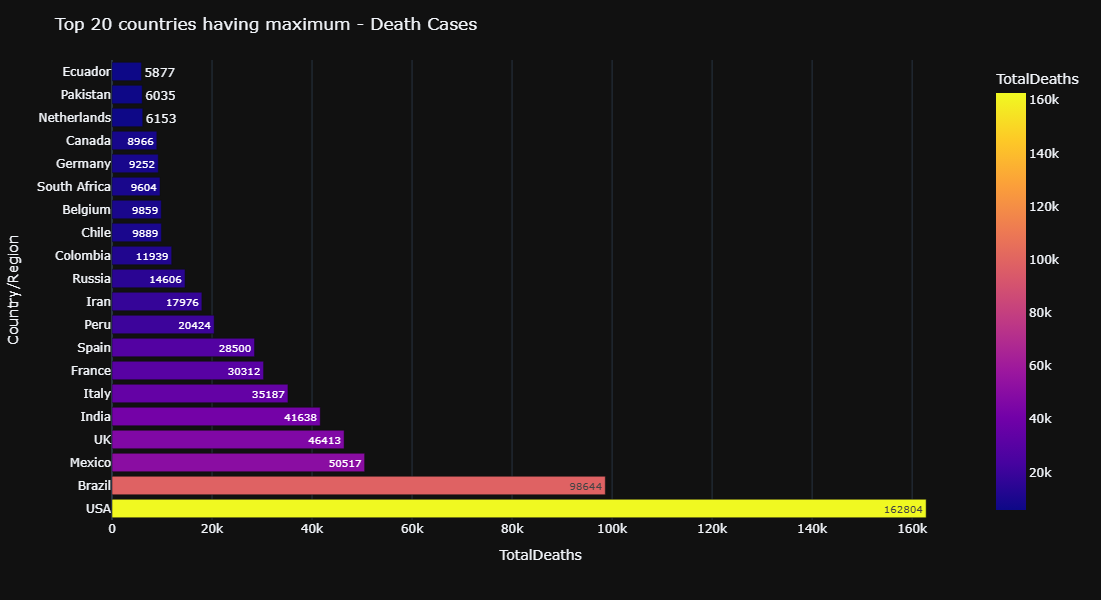

In [58]:
fig3 = px.bar(world_data.sort_values(by='TotalDeaths', ascending=False)[0:20], y='Country/Region', x='TotalDeaths',color='TotalDeaths',text='TotalDeaths')
fig3.update_layout(template='plotly_dark', title_text='Top 20 countries having maximum - Death Cases',height=600)
fig3.show()

In [ ]:
# Worst 20 countries having maximum - Active Cases

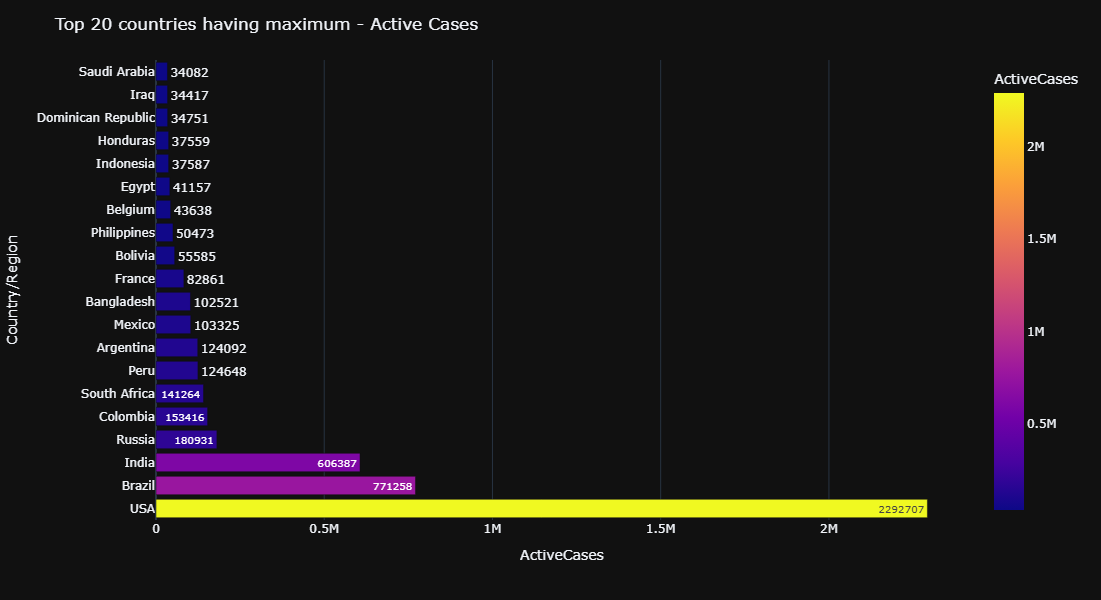

In [59]:
fig3 = px.bar(world_data.sort_values(by='ActiveCases', ascending=False)[0:20], y='Country/Region', x='ActiveCases',color='ActiveCases',text='ActiveCases')
fig3.update_layout(template='plotly_dark', title_text='Top 20 countries having maximum - Active Cases',height=600)
fig3.show()

In [ ]:
# Worst 20 countries having maximum - Recovered Cases

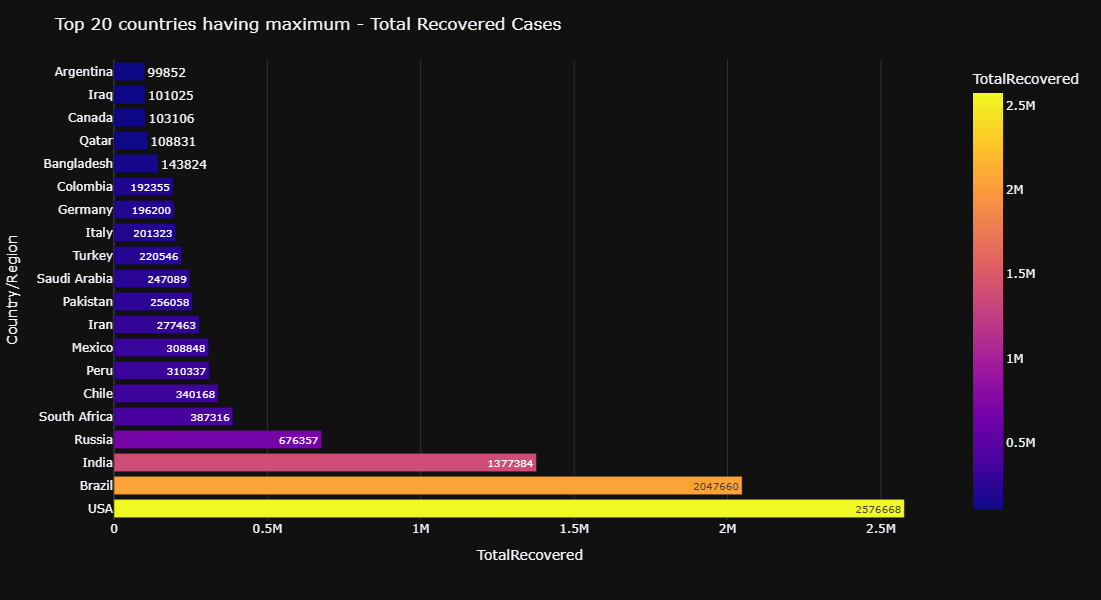

In [60]:
fig3 = px.bar(world_data.sort_values(by='TotalRecovered', ascending=False)[0:20], y='Country/Region', x='TotalRecovered',color='TotalRecovered',text='TotalRecovered')
fig3.update_layout(template='plotly_dark', title_text='Top 20 countries having maximum - Total Recovered Cases',height=600)
fig3.show()

In [ ]:
# Pie chart representation of status of worst affected countires.

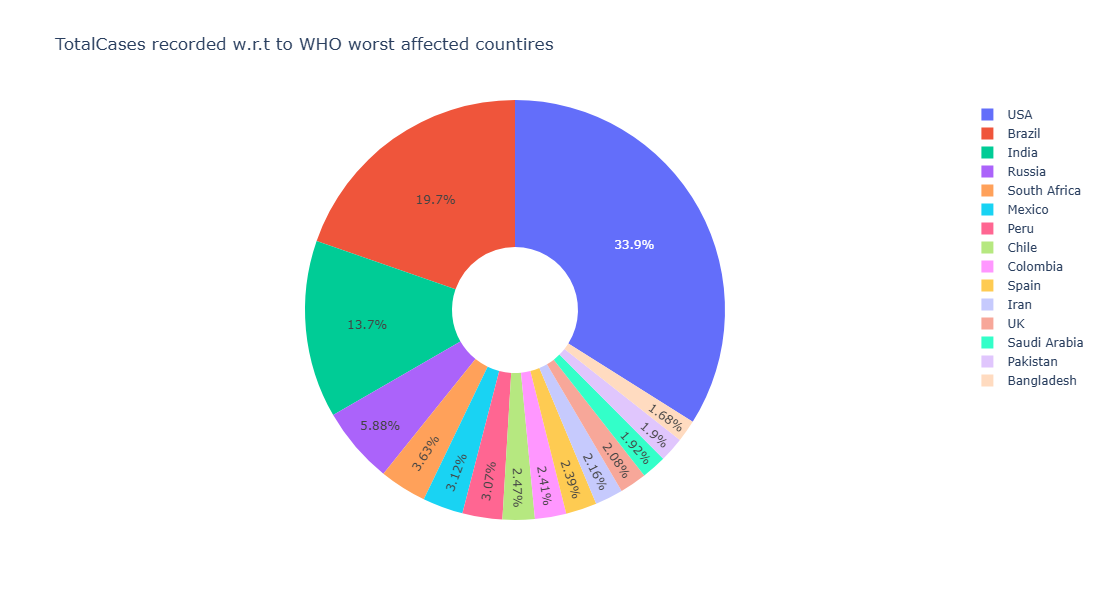

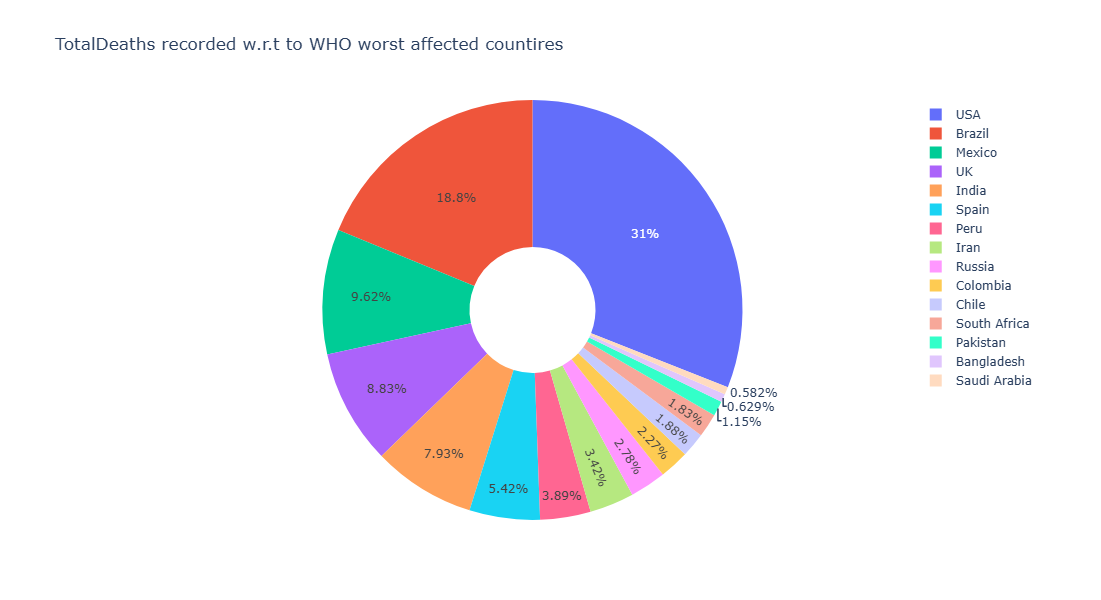

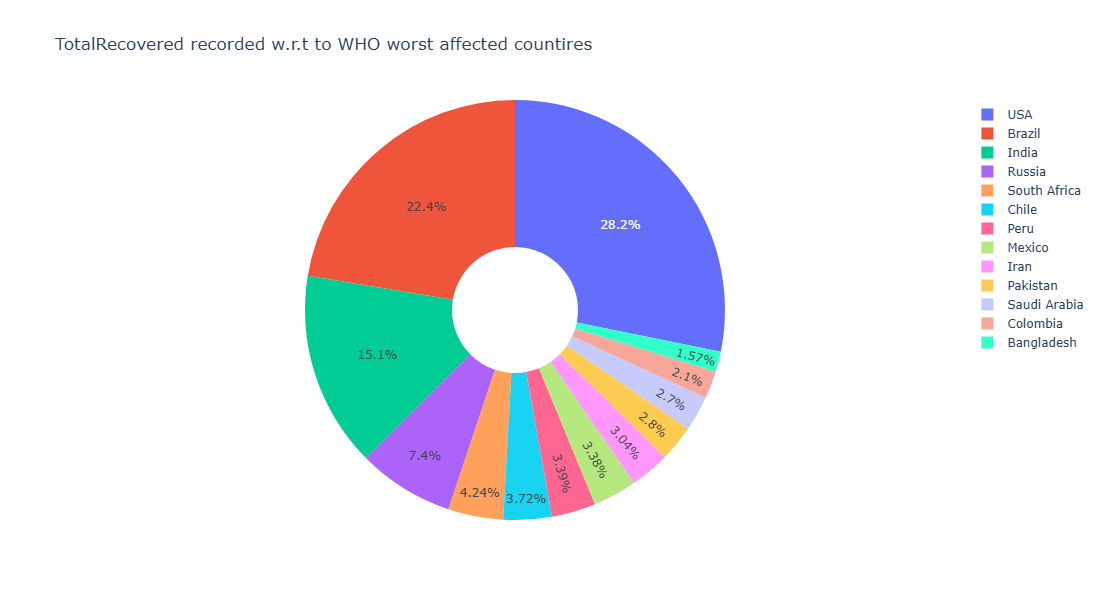

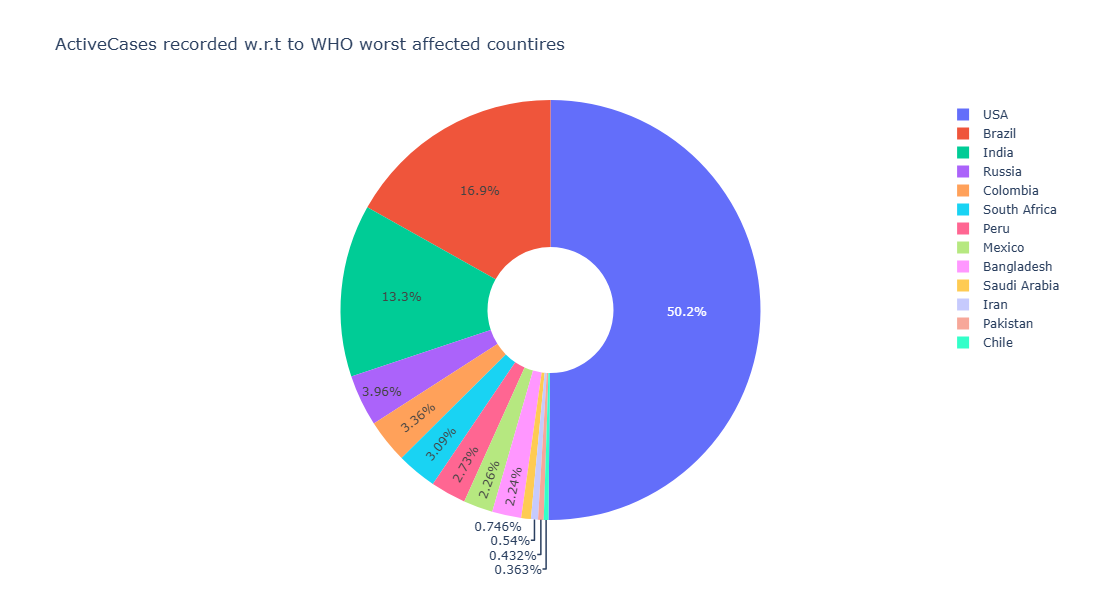

In [67]:
labels = world_data[0:15]['Country/Region'].values
cases = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in cases:
    fig4=px.pie(world_data[0:15],values=i,names=labels,hole=0.3,title="{} recorded w.r.t to WHO worst affected countires".format(i),width=800,height=600)
    fig4.show()

In [ ]:
# Deaths to confrim Ratio

In [69]:
world_data.head(3)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia


In [70]:
deaths_to_confirmed = world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

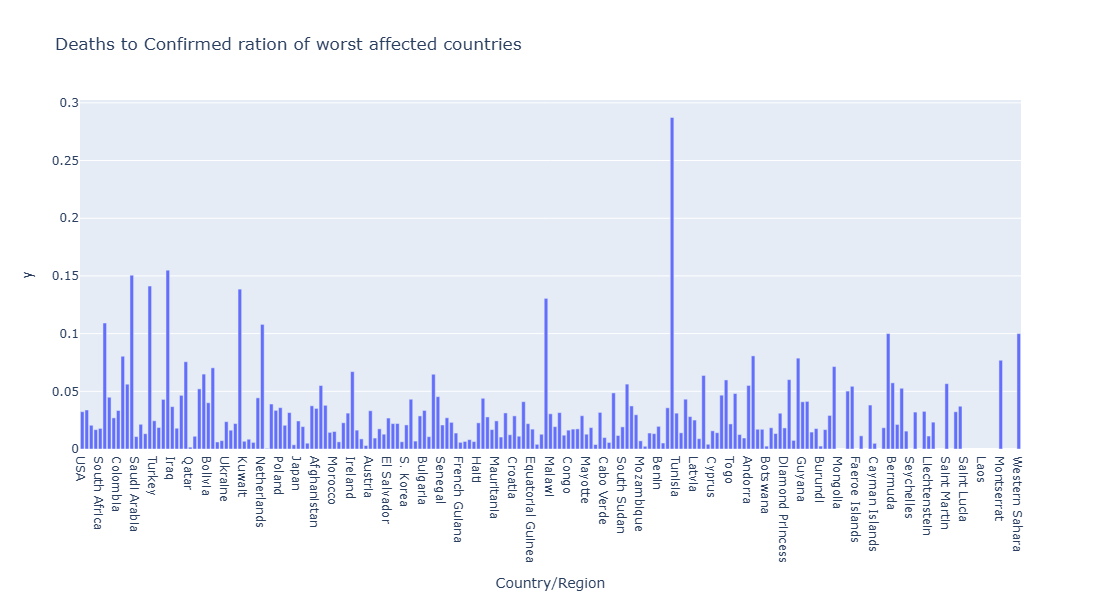

In [74]:
px.bar(world_data, x='Country/Region', y=deaths_to_confirmed, title="Deaths to Confirmed ration of worst affected countries",height=600)

In [ ]:
# Deaths to Recovered Ratio

In [75]:
deaths_to_recovered = world_data['TotalDeaths']/world_data['TotalRecovered']
deaths_to_recovered

0      0.063184
1      0.048174
2      0.030230
3      0.021595
4      0.024796
         ...   
204    0.100000
205         NaN
206         NaN
207         NaN
208    0.125000
Length: 209, dtype: float64

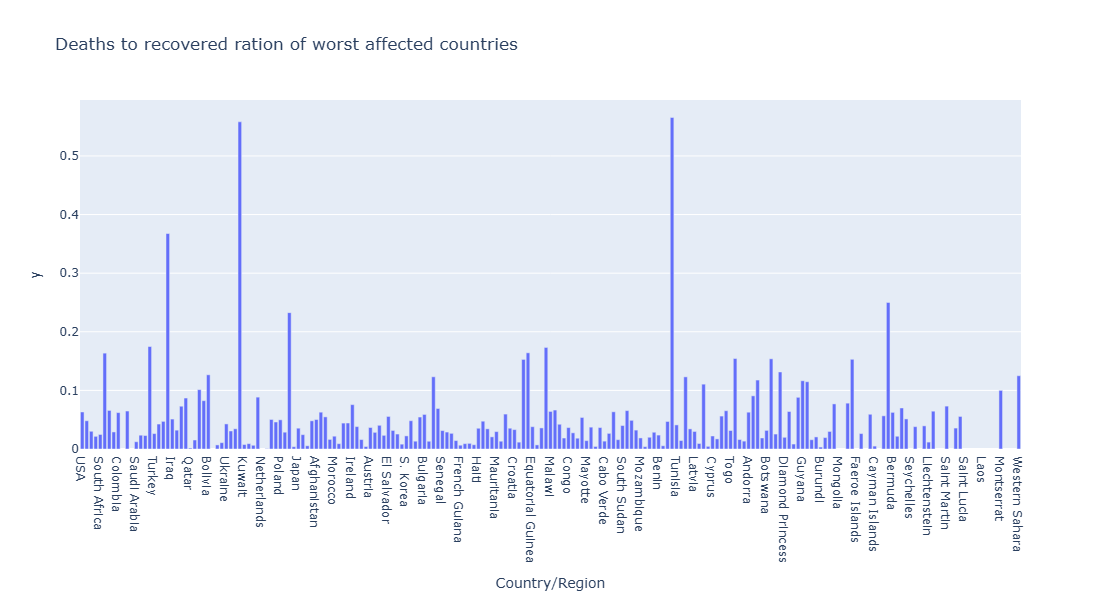

In [76]:
px.bar(world_data, x='Country/Region', y=deaths_to_recovered, title="Deaths to recovered ration of worst affected countries",height=600)

In [ ]:
# Tests to Confrim Ratio

In [77]:
tests_to_confirmed = world_data['TotalTests']/world_data['TotalCases']
tests_to_confirmed

0       12.547170
1        4.526446
2       10.935742
3       34.083165
4        5.852658
          ...    
204      4.692308
205     32.615385
206    139.692308
207           NaN
208           NaN
Length: 209, dtype: float64

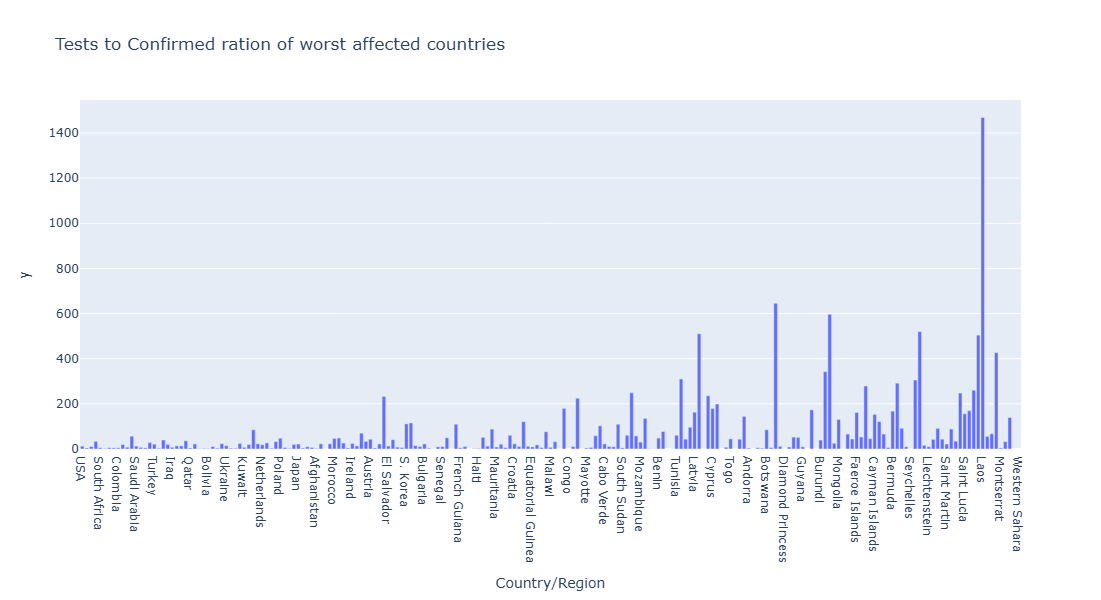

In [78]:
px.bar(world_data, x='Country/Region', y=tests_to_confirmed, title="Tests to Confirmed ration of worst affected countries",height=600)

In [ ]:
# Serious to Death Ratio

In [80]:
serious_to_death = world_data['Serious,Critical']/world_data['TotalDeaths']
serious_to_death

0      0.112381
1      0.084323
2      0.214804
3      0.157470
4      0.056122
         ...   
204         NaN
205         NaN
206         NaN
207         NaN
208         NaN
Length: 209, dtype: float64

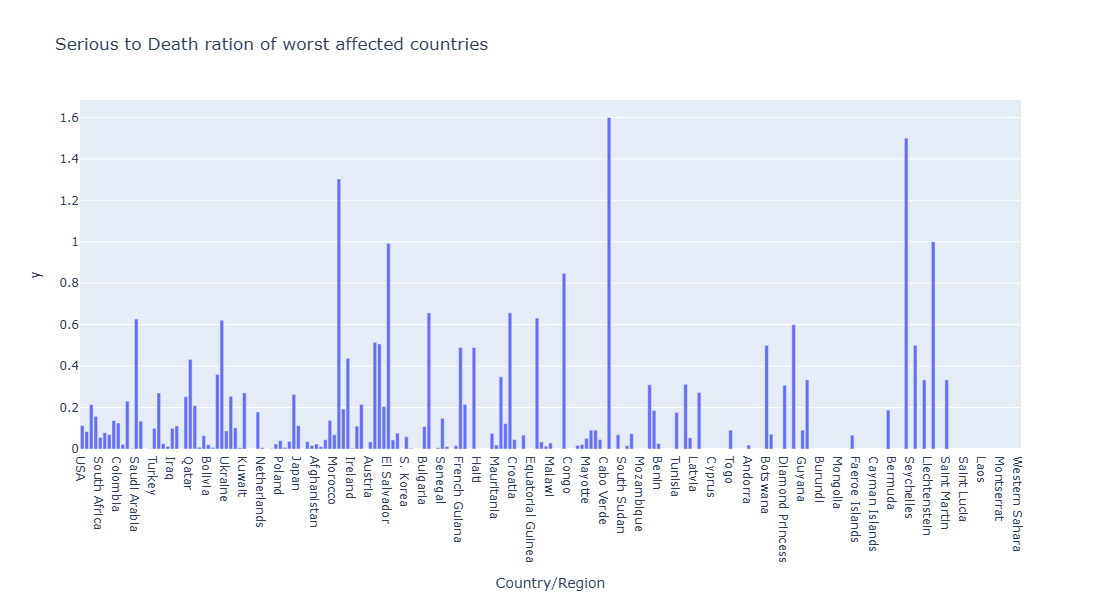

In [81]:
px.bar(world_data, x='Country/Region', y=serious_to_death, title="Serious to Death ration of worst affected countries",height=600)

In [82]:
world_data.head(2)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas


In [ ]:
# How to automate our Analysis

In [84]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [100]:
def country_visualisations(df, country):
    data=df[df['Country/Region']==country]

    data2 = data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]

    fig = make_subplots(rows=1,cols=4, subplot_titles=('Confirmed','Active','Recovered','Deaths'))

    fig.add_trace(
        go.Scatter(name='Confirmed',x=data2['Date'], y=data2['Confirmed']),row=1,col=1
    )
    
    fig.add_trace(
        go.Scatter(name='Deaths',x=data2['Date'], y=data2['Deaths']),row=1,col=2
    )
    fig.add_trace(
        go.Scatter(name='Recovered',x=data2['Date'], y=data2['Recovered']),row=1,col=3
    )
    fig.add_trace(
        go.Scatter(name='Active',x=data2['Date'], y=data2['Active']),row=1,col=4
    )
    fig.update_layout(height=600,width=1000, title_text='Date vs Recorded case of {}'.format(country), template="plotly_dark")
    fig.show()


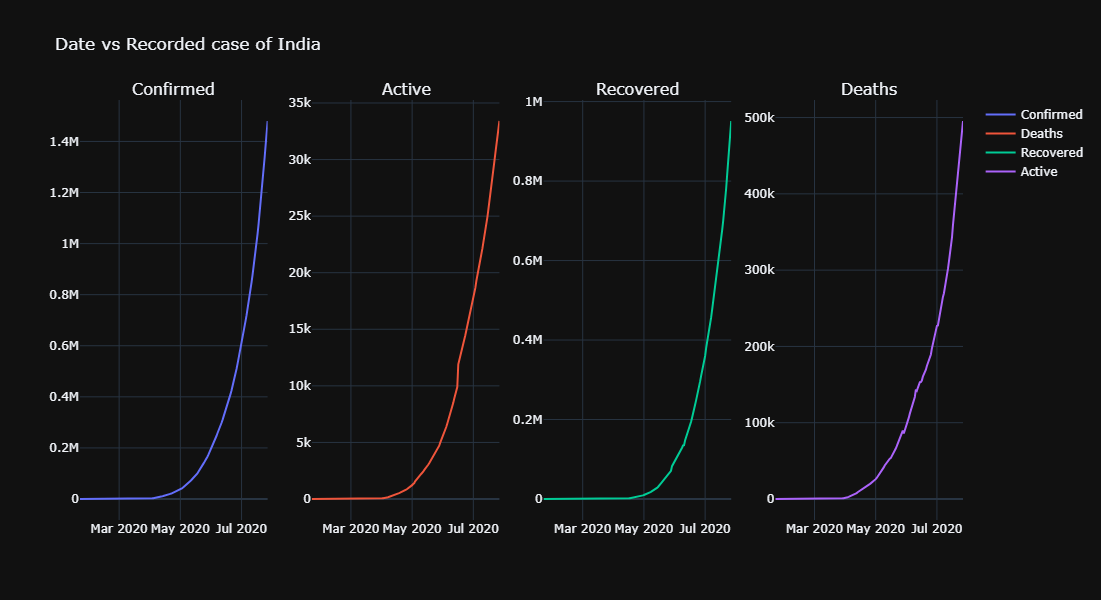

In [102]:
country_visualisations(group_data,'India')

In [103]:
 group_data.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
